# Load and extract Suicide Risk Lexicon

Lexicon validated by clincians with expertise in suicide research


In [1]:
# Temporary: Recreate lexicon with new structure





In [24]:
import pandas as pd
import json
import sys
sys.path.append('./../src/')
sys.path.append('./../src/construct_tracker/')
from construct_tracker import lexicon



In [168]:
srl = lexicon.load_lexicon('./../src/construct_tracker/data/lexicons/suicide_risk_lexicon_v1-0/suicide_risk_lexicon_validated_24-08-02T21-27-35.159565.pickle')
srl_prototypes = lexicon.load_lexicon('./../src/construct_tracker/data/lexicons/suicide_risk_lexicon_v1-0/suicide_risk_lexicon_validated_prototypical_tokens_24-08-07T16-25-19.379659.pickle')

In [ ]:
srl_prototypes.save('./../src/construct_tracker/data/lexicons/suicide_risk_lexicon_v1-0/suicide_risk_lexicon_validated_prototypical_tokens_24-08-07T16-25-19.379659.pickle')

In [28]:
# load reddit posts and count 

reddit_df = pd.read_csv('./../src/construct_tracker/data/datasets/reddit_27_subreddits/rmhd_27subreddits_1040posts_train.csv', index_col=0)
reddit_df

,subreddit,author,date,post,automated_readability_index,coleman_liau_index,flesch_kincaid_grade_level,flesch_reading_ease,gulpease_index,gunning_fog_index,...,tfidf_wish,tfidf_without,tfidf_wonder,tfidf_work,tfidf_worri,tfidf_wors,tfidf_would,tfidf_wrong,tfidf_x200b,tfidf_year
0,EDAnonymous,lillylourose,2018/11/28,"The reason why I stoped with eating? Well, for...",0.478964,2.747789,2.109524,95.205000,86.583333,4.761905,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0
1,EDAnonymous,tinyTRONgirl,2019/10/15,I’m freaking out WHY can’t my body just digest...,5.559945,5.475852,6.247874,80.769913,67.394161,8.309854,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.131764,0.000000,0.00000,0.0
2,EDAnonymous,Vetmyana,2019/07/02,Tw weight loss achievement Just lost 8lbs (wei...,2.546452,4.004821,3.520194,91.910290,75.451613,4.960000,...,0.0,0.254812,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,EDAnonymous,Fastingcametome,2019/07/25,When not eating is your solution to everything...,0.836122,2.859536,2.359891,95.598204,82.741497,5.824762,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.145753,0.00000,0.0
4,EDAnonymous,bananamo7,2019/04/19,How to dedicate a long weekend to beginning re...,5.119444,6.724697,6.719444,70.932500,69.185185,10.585185,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28075,unitedkingdom,Anomalous-Entity,2019/05/07,When someone is having a go at the U.S. and ma...,1.758324,4.527215,4.326374,77.275769,88.038462,6.048352,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.258879,0.000000,0.00000,0.0
28076,unitedkingdom,Squigglish,2019/03/28,My MP voted against every single Indicative Mo...,6.098205,9.032098,6.976923,52.759744,104.384615,7.887179,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0
28077,unitedkingdom,javaxcore,2019/09/02,What is Order 66? I have heard much talk of th...,0.761500,2.701924,1.290000,103.625000,82.500000,4.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0
28078,unitedkingdom,AlwaysGoForAusInRisk,2019/05/13,Seeing the GB Ambassador for Denmark today at ...,8.632452,8.773091,9.139258,61.853071,60.968504,12.296513,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0


In [29]:
reddit_df.groupby('subreddit').count()['author']

subreddit
EDAnonymous          1040
ForeverAlone         1040
UKPersonalFinance    1040
addiction            1040
adhd                 1040
alcoholism           1040
anxiety              1040
autism               1040
bipolarreddit        1040
bpd                  1040
conspiracy           1040
depression           1040
divorce              1040
guns                 1040
healthanxiety        1040
legaladvice          1040
lonely               1040
mentalhealth         1040
mindfulness          1040
personalfinance      1040
ptsd                 1040
schizophrenia        1040
socialanxiety        1040
suicidewatch         1040
teaching             1040
ukpolitics           1040
unitedkingdom        1040
Name: author, dtype: int64

In [30]:
reddit_df_mini = reddit_df[reddit_df['subreddit'].isin(['anxiety','bpd','depression','suicidewatch'])]
documents = reddit_df_mini['post'].values
print(len(documents))

4160


In [31]:
# Now count whether tokens appear in document:
# About 75 sec for 4160 reddits posts

load = True

if load:
	counts = pd.read_csv('./../src/construct_tracker/data/feature_extraction/reddit_4_subreddits_suicide_risk_lexicon_counts.csv', index_col=0)
else:
	counts, matches_by_construct, matches_doc2construct, matches_construct2doc  = srl.extract(documents,
																						normalize = False,
																						)
	display(counts)

	counts.to_csv('./../src/construct_tracker/data/datasets/feature_extraction/reddit_4_subreddits_suicide_risk_lexicon_counts.csv')
	counts['subreddit'] = reddit_df_mini['subreddit'].values


In [32]:
counts

,document_id,document,Passive suicidal ideation,Active suicidal ideation & suicidal planning,Lethal means for suicide,Direct self-injury,Suicide exposure,Other suicidal language,Hospitalization,Loneliness & isolation,...,Physical health issues & disability,Incarceration,Poverty & homelessness,Gender & sexual identity,Discrimination,Finances & work stress,Barriers to treatment,Mental health treatment,word_count,subreddit
0,0,How many people here work and had a hard time ...,0,0,0,0,0,0,0,2,...,0,0,0,0,0,4,0,0,192,anxiety
1,1,How to deal with brothers girlfriend I'm 16 yr...,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,153,anxiety
2,2,Break-in anxiety advice desperately needed So ...,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,98,anxiety
3,3,I really cannot deal with living like this. I ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,112,anxiety
4,4,Can someone track my flight? Flying DFW to MIA...,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,81,anxiety
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,4155,I'm tired of self-hatred. It's irrational and ...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,26,suicidewatch
4156,4156,Why it's hard to find a friend I feel jealous ...,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,84,suicidewatch
4157,4157,Suicide... I hate this world honestly..... And...,2,3,3,2,2,6,0,0,...,1,0,1,0,0,2,0,0,504,suicidewatch
4158,4158,i don't know. I don't know if this is the righ...,0,0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,35,suicidewatch


In [ ]:
counts.to_csv('./../src/construct_tracker/data/datasets/reddit_4_subreddits_suicide_risk_lexicon_counts.csv')

In [33]:
srl.constructs.keys()

dict_keys(['Passive suicidal ideation', 'Active suicidal ideation & suicidal planning', 'Lethal means for suicide', 'Direct self-injury', 'Suicide exposure', 'Other suicidal language', 'Hospitalization', 'Loneliness & isolation', 'Social withdrawal', 'Relationship issues', 'Relationships & kinship', 'Bullying', 'Sexual abuse & harassment', 'Physical abuse & violence', 'Aggression & irritability', 'Alcohol use', 'Other substance use', 'Impulsivity', 'Defeat & feeling like a failure', 'Burdensomeness', 'Shame, self-disgust, & worthlessness', 'Guilt', 'Anxiety', 'Panic', 'Entrapment & desire to escape', 'Trauma & PTSD', 'Agitation', 'Rumination', 'Depressed mood', 'Anhedonia & uninterested', 'Emotional pain & psychache', 'Grief & bereavement', 'Existential meaninglessness & purposelessness', 'Emptiness', 'Hopelessness', 'Perfectionism', 'Fatigue & tired', 'Sleep issues', 'Psychosis & schizophrenia', 'Bipolar Disorder', 'Borderline Personality Disorder', 'Eating disorders', 'Physical healt

In [34]:
from importlib import reload
reload(lexicon)

<module 'construct_tracker.lexicon' from '/Users/danielmlow/Dropbox (MIT)/datum/construct-tracker/tutorials/./../src/construct_tracker/lexicon.py'>

In [167]:
# Interpret counts: visualize matches in context  
n = 2
highlight_constructs = ['Lethal means for suicide', 'Passive suicidal ideation', 'Direct self-injury', 'Panic', 'Depressed mood']
for construct in highlight_constructs:
	print(f'Matches for {construct}:')
	lexicon.highlight_matches(documents, construct,n, matches_construct2doc, random_seed=42)
	print()



Matches for Lethal means for suicide:



Matches for Passive suicidal ideation:



Matches for Direct self-injury:



Matches for Panic:



Matches for Depressed mood:


In [36]:
reddit_df_mini['subreddit']

6240          anxiety
6241          anxiety
6242          anxiety
6243          anxiety
6244          anxiety
             ...     
24955    suicidewatch
24956    suicidewatch
24957    suicidewatch
24958    suicidewatch
24959    suicidewatch
Name: subreddit, Length: 4160, dtype: object

Text(0, 0.5, 'counts')

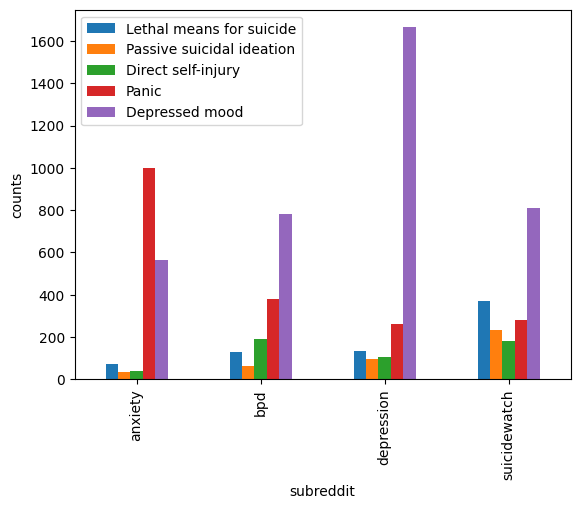

In [37]:
# Bar plot of counts split by subreddit
import matplotlib.pyplot as plt
counts[highlight_constructs+['subreddit']].groupby('subreddit').sum().plot.bar()
plt.ylabel('counts')


### 2. Construct-Text Similarity (CTS)
Find similar tokens to the tokens in the lexicon

In [38]:
from construct_tracker import cts
# reload(cts)


In [51]:
toy = True # Faster
if toy:
	documents_subset = documents[::100]
	subreddits = reddit_df_mini['subreddit'].values[::100]
	print(len(documents_subset))


42


In [52]:

# 31 sec for 42 reddit posts and 50 constructs
lexicon_dict = srl.to_dict()
features, documents_tokenized, lexicon_dict_final_order, cosine_similarities = cts.measure(
    lexicon_dict,
    documents_subset,
	stored_embeddings_path = '/Users/danielmlow/Dropbox (MIT)/datum/construct-tracker/src/construct_tracker/data/lexicons/suicide_risk_lexicon_v1-0/embeddings_srl-tokens_all-MiniLM-L6-v2.pickle',
	# stored_embeddings_path = './data/lexicons/suicide_risk_lexicon_v1-0/embeddings_srl-tokens_all-MiniLM-L6-v2.pickle',
    )

display(features)


2024-08-06 14:19:09,977 - construct_tracker.cts - INFO - Loading existing lexicon token embeddings
2024-08-06 14:19:10,425 - construct_tracker.cts - INFO - Default input sequence length for all-MiniLM-L6-v2: 256
2024-08-06 14:19:10,426 - construct_tracker.cts - INFO - Encoding 43 new tokens
Batches: 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]
2024-08-06 14:19:10,809 - construct_tracker.cts - INFO - Finished.
2024-08-06 14:19:10,811 - construct_tracker.cts - INFO - Tokenizing documents...
2024-08-06 14:19:14,058 - construct_tracker.cts - INFO - Finished tokenization.
2024-08-06 14:19:14,059 - construct_tracker.cts - INFO - Encoding all document tokens...
2024-08-06 14:19:36,923 - construct_tracker.cts - INFO - computing similarity between 50 constructs and 42 documents...
42it [00:04,  9.99it/s]
2024-08-06 14:19:41,228 - construct_tracker.cts - INFO - Finished.


,doc_id,documents,documents_tokenized,Passive suicidal ideation_max,Active suicidal ideation & suicidal planning_max,Lethal means for suicide_max,Direct self-injury_max,Suicide exposure_max,Other suicidal language_max,Hospitalization_max,...,Borderline Personality Disorder_max,Eating disorders_max,Physical health issues & disability_max,Incarceration_max,Poverty & homelessness_max,Gender & sexual identity_max,Discrimination_max,Finances & work stress_max,Barriers to treatment_max,Mental health treatment_max
0,0,I can’t stop fucking up I’ve been single for a...,[I ca n’t stop fucking up I ’ve been single fo...,0.418133,0.336027,0.301900,0.320670,0.284866,0.394712,0.281085,...,0.416027,0.314948,0.387567,0.296644,0.420152,0.360396,0.349323,0.502013,0.466912,0.413218
1,1,DAE has a hard time playing open world videoga...,[DAE has a hard time playing open world videog...,0.401787,0.375796,0.375796,0.375796,0.369915,0.347755,0.283834,...,0.362468,0.346981,0.353525,0.312064,0.301211,0.302142,0.382396,0.502379,0.486006,0.357434
2,2,Leaving on vacation tomorrow for 3 weeks and a...,[Leaving on vacation tomorrow for 3 weeks and ...,0.469303,0.464369,0.464369,0.464369,0.440437,0.567165,0.473857,...,0.468956,0.643986,0.511236,0.387723,0.349624,0.444853,0.453192,0.452001,0.795540,0.754335
3,3,Social perfectionism is fueling my anxiety and...,"[Social perfectionism is fueling my anxiety, I...",0.382488,0.351179,0.351179,0.290796,0.337315,0.360820,0.269303,...,0.321498,0.310051,0.335242,0.372078,0.311756,0.314659,0.338008,0.298961,0.281896,0.317315
4,4,How many people here work and had a hard time ...,"[How many people here work and?, had a hard ti...",0.360513,0.347241,0.367812,0.278101,0.208270,0.281349,0.221607,...,0.334824,0.290655,0.548262,0.188028,0.410888,0.213276,0.230652,0.298391,0.302167,0.449146
5,5,Anxiety from arguing with strangers on social ...,[Anxiety from arguing with strangers on social...,0.482381,0.572739,0.572739,0.572739,0.319866,0.599503,0.426135,...,0.517757,0.347307,0.443371,0.319730,0.431392,0.252414,0.561947,0.472914,0.439445,0.393428
6,6,Irrational to a Whole New Level Hi there! I am...,"[Irrational to a Whole New Level, Hi there!, I...",0.752489,0.460490,0.391815,0.391815,0.487138,0.534222,0.251301,...,0.589977,0.448975,0.399343,0.315760,0.312078,0.336832,0.360036,0.312078,0.384789,0.364639
7,7,How are you supposed to get better if you're s...,[How are you supposed to get better if you're ...,0.550465,0.514668,0.436945,0.440428,0.391870,0.517357,0.438442,...,0.535155,0.439514,0.379952,0.432010,0.556935,0.417772,0.329518,0.521295,0.492601,0.453085
8,8,Does anyone else get this really cold feeling ...,[Does anyone else get this really cold feeling...,0.394846,0.378159,0.354221,0.356537,0.309675,0.402141,0.284294,...,0.602935,0.353297,0.361774,0.337801,0.304780,0.275028,0.334341,0.313723,0.455568,0.379975
9,9,Waking up 5-6 times a night in panic? I feel l...,"[Waking up 5 - 6 times a night in panic?, I fe...",0.558940,0.393964,0.413826,0.393964,0.283376,0.459760,0.314776,...,0.433046,0.389461,0.563293,0.271168,0.327743,0.345943,0.345496,0.713735,0.421215,0.619374


In [121]:
cosine_similarities.get('4_Passive suicidal ideation')

array([[-0.0023873 ,  0.15783121,  0.21023528,  0.07179514],
       [ 0.10150352,  0.22417206,  0.26464381,  0.10891452],
       [ 0.00470096,  0.11562579,  0.11609699,  0.09508882],
       [-0.01186171,  0.07100478,  0.07376888,  0.07829191],
       [ 0.08728864,  0.11551876,  0.16459886,  0.14974612],
       [ 0.08602802,  0.09369048,  0.17606942,  0.12677881],
       [ 0.10095327,  0.14758561,  0.32423642,  0.08741632],
       [ 0.09143589,  0.18259126,  0.27346128,  0.07356674],
       [-0.00271982,  0.06207897,  0.12175217, -0.01073465],
       [ 0.16605598,  0.19777901,  0.36051279,  0.07520876],
       [-0.02637835,  0.0891033 ,  0.20973516,  0.0451788 ],
       [ 0.05912534,  0.12296195,  0.13505961,  0.25928153],
       [ 0.08966427,  0.20117975,  0.23095951,  0.13926274],
       [ 0.15819906,  0.16933485,  0.28134863,  0.1325894 ],
       [-0.05409483,  0.10071073,  0.12067328,  0.07020139],
       [-0.00549822,  0.12086075,  0.17242408,  0.06667062],
       [ 0.31146788,  0.

In [123]:
counts, matches_by_construct, matches_doc2construct, matches_construct2doc  = srl.extract(documents_subset,
																						normalize = False,
																						)

extracting... 


  0%|          | 0/50 [00:00<?, ?it/s]/Users/danielmlow/Dropbox (MIT)/datum/construct-tracker/tutorials/./../src/construct_tracker/lexicon.py:775: UserWarning: Lemmatizing the tokens. We recommend you lemmatize before extracting so you can save time if you want to repeat extraction on different documents.
  warnings.warn(
100%|██████████| 50/50 [00:38<00:00,  1.31it/s]


(42, 53)

True

,Passive suicidal ideation_max,Active suicidal ideation & suicidal planning_max,Lethal means for suicide_max,Direct self-injury_max,Suicide exposure_max,Other suicidal language_max,Hospitalization_max,Loneliness & isolation_max,Social withdrawal_max,Relationship issues_max,...,Borderline Personality Disorder_max,Eating disorders_max,Physical health issues & disability_max,Incarceration_max,Poverty & homelessness_max,Gender & sexual identity_max,Discrimination_max,Finances & work stress_max,Barriers to treatment_max,Mental health treatment_max
0,0,0,0,0,0,0,0,2,1,0,...,1,0,0,0,0,0,0,4,0,0
1,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,2,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,1,0,0,0,0,0,0,1,0,2,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2,0,0


In [128]:
counts[sr.c]

,Passive suicidal ideation_max,Active suicidal ideation & suicidal planning_max,Lethal means for suicide_max,Direct self-injury_max,Suicide exposure_max,Other suicidal language_max,Hospitalization_max,Loneliness & isolation_max,Social withdrawal_max,Relationship issues_max,...,Borderline Personality Disorder_max,Eating disorders_max,Physical health issues & disability_max,Incarceration_max,Poverty & homelessness_max,Gender & sexual identity_max,Discrimination_max,Finances & work stress_max,Barriers to treatment_max,Mental health treatment_max
0,0,0,0,0,0,0,0,2,1,0,...,1,0,0,0,0,0,0,4,0,0
1,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,2,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,1,0,0,0,0,0,0,1,0,2,...,1,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,2,0,0


In [70]:
highlight_constructs_max = [n+'_max' for n in highlight_constructs]
highlight_constructs_max = [highlight_constructs_max+['subreddit']]
highlight_constructs_max


['Lethal means for suicide_max',
 'Passive suicidal ideation_max',
 'Direct self-injury_max',
 'Panic_max',
 'Depressed mood_max']

In [173]:
features

,doc_id,documents,documents_tokenized,Passive suicidal ideation_max,Active suicidal ideation & suicidal planning_max,Lethal means for suicide_max,Direct self-injury_max,Suicide exposure_max,Other suicidal language_max,Hospitalization_max,...,Eating disorders_max,Physical health issues & disability_max,Incarceration_max,Poverty & homelessness_max,Gender & sexual identity_max,Discrimination_max,Finances & work stress_max,Barriers to treatment_max,Mental health treatment_max,subreddit
0,0,I can’t stop fucking up I’ve been single for a...,[I ca n’t stop fucking up I ’ve been single fo...,0.418133,0.336027,0.301900,0.320670,0.284866,0.394712,0.281085,...,0.314948,0.387567,0.296644,0.420152,0.360396,0.349323,0.502013,0.466912,0.413218,anxiety
1,1,DAE has a hard time playing open world videoga...,[DAE has a hard time playing open world videog...,0.401787,0.375796,0.375796,0.375796,0.369915,0.347755,0.283834,...,0.346981,0.353525,0.312064,0.301211,0.302142,0.382396,0.502379,0.486006,0.357434,anxiety
2,2,Leaving on vacation tomorrow for 3 weeks and a...,[Leaving on vacation tomorrow for 3 weeks and ...,0.469303,0.464369,0.464369,0.464369,0.440437,0.567165,0.473857,...,0.643986,0.511236,0.387723,0.349624,0.444853,0.453192,0.452001,0.795540,0.754335,anxiety
3,3,Social perfectionism is fueling my anxiety and...,"[Social perfectionism is fueling my anxiety, I...",0.382488,0.351179,0.351179,0.290796,0.337315,0.360820,0.269303,...,0.310051,0.335242,0.372078,0.311756,0.314659,0.338008,0.298961,0.281896,0.317315,anxiety
4,4,How many people here work and had a hard time ...,"[How many people here work and?, had a hard ti...",0.360513,0.347241,0.367812,0.278101,0.208270,0.281349,0.221607,...,0.290655,0.548262,0.188028,0.410888,0.213276,0.230652,0.298391,0.302167,0.449146,anxiety
5,5,Anxiety from arguing with strangers on social ...,[Anxiety from arguing with strangers on social...,0.482381,0.572739,0.572739,0.572739,0.319866,0.599503,0.426135,...,0.347307,0.443371,0.319730,0.431392,0.252414,0.561947,0.472914,0.439445,0.393428,anxiety
6,6,Irrational to a Whole New Level Hi there! I am...,"[Irrational to a Whole New Level, Hi there!, I...",0.752489,0.460490,0.391815,0.391815,0.487138,0.534222,0.251301,...,0.448975,0.399343,0.315760,0.312078,0.336832,0.360036,0.312078,0.384789,0.364639,anxiety
7,7,How are you supposed to get better if you're s...,[How are you supposed to get better if you're ...,0.550465,0.514668,0.436945,0.440428,0.391870,0.517357,0.438442,...,0.439514,0.379952,0.432010,0.556935,0.417772,0.329518,0.521295,0.492601,0.453085,anxiety
8,8,Does anyone else get this really cold feeling ...,[Does anyone else get this really cold feeling...,0.394846,0.378159,0.354221,0.356537,0.309675,0.402141,0.284294,...,0.353297,0.361774,0.337801,0.304780,0.275028,0.334341,0.313723,0.455568,0.379975,anxiety
9,9,Waking up 5-6 times a night in panic? I feel l...,"[Waking up 5 - 6 times a night in panic?, I fe...",0.558940,0.393964,0.413826,0.393964,0.283376,0.459760,0.314776,...,0.389461,0.563293,0.271168,0.327743,0.345943,0.345496,0.713735,0.421215,0.619374,anxiety


In [113]:
# If below threshold then replace with NaN
import numpy as np
threshold = 0.45 # depends on embeddings used
features_threshold = features[highlight_constructs_max]
features_threshold[features_threshold <= threshold] = np.nan
features_threshold['subreddit'] = subreddits

/var/folders/6f/x95fldf13xn_k25tybdzgtqw0000gn/T/ipykernel_59795/494498664.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_threshold[features_threshold <= threshold] = np.nan
/var/folders/6f/x95fldf13xn_k25tybdzgtqw0000gn/T/ipykernel_59795/494498664.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_threshold[features_threshold <= threshold] = np.nan
/var/folders/6f/x95fldf13xn_k25tybdzgtqw0000gn/T/ipykernel_59795/494498664.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [174]:
features_threshold

,Lethal means for suicide_max,Passive suicidal ideation_max,Direct self-injury_max,Panic_max,Depressed mood_max,subreddit
0,NaN,NaN,NaN,NaN,NaN,anxiety
1,2.0,NaN,NaN,NaN,NaN,anxiety
2,NaN,1.000000,NaN,1.0,2.0,anxiety
3,NaN,NaN,NaN,1.0,NaN,anxiety
4,NaN,NaN,NaN,NaN,NaN,anxiety
5,1.0,NaN,NaN,4.0,NaN,anxiety
6,NaN,1.000000,NaN,1.0,NaN,anxiety
7,NaN,NaN,NaN,NaN,3.0,anxiety
8,NaN,NaN,NaN,NaN,2.0,anxiety
9,NaN,NaN,NaN,3.0,1.0,anxiety


Text(0, 0.5, 'Sum of cosine similarities > 0.45')

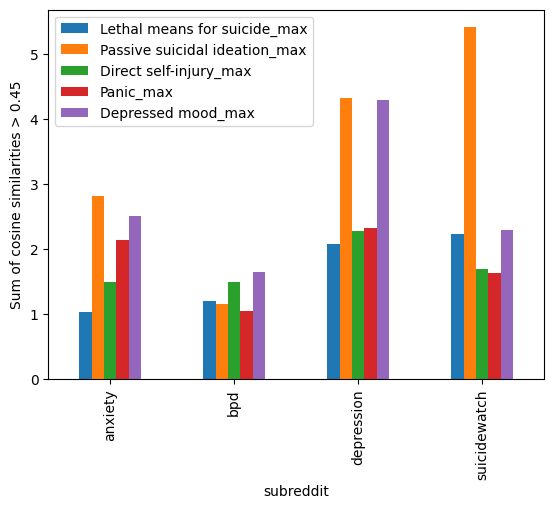

In [114]:
# Bar plot of counts split by subreddit
import matplotlib.pyplot as plt
features_threshold[highlight_constructs_max+['subreddit']].groupby('subreddit').sum().plot.bar()
plt.ylabel(f'Sum of cosine similarities > {threshold}')


Text(0, 0.5, 'Sum of cosine similarities')

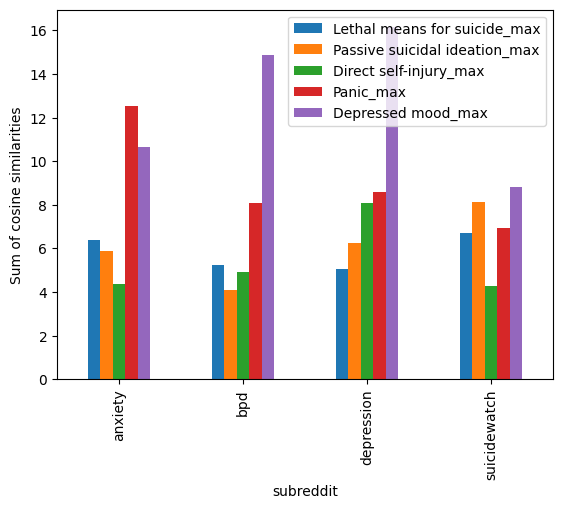

In [140]:
# Creating the new dataframe based on the conditions
result = counts.where(counts >= 1, features)
result['subreddit']=subreddits


# Bar plot of counts split by subreddit
result[highlight_constructs_max+['subreddit']].groupby('subreddit').sum().plot.bar()
plt.ylabel(f'Sum of cosine similarities')


/var/folders/6f/x95fldf13xn_k25tybdzgtqw0000gn/T/ipykernel_59795/1466759863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_threshold[features_threshold <= threshold] = np.nan
/var/folders/6f/x95fldf13xn_k25tybdzgtqw0000gn/T/ipykernel_59795/1466759863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_threshold[features_threshold <= threshold] = np.nan
/var/folders/6f/x95fldf13xn_k25tybdzgtqw0000gn/T/ipykernel_59795/1466759863.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

Text(0, 0.5, 'Sum of cosine similarities > 0.45')

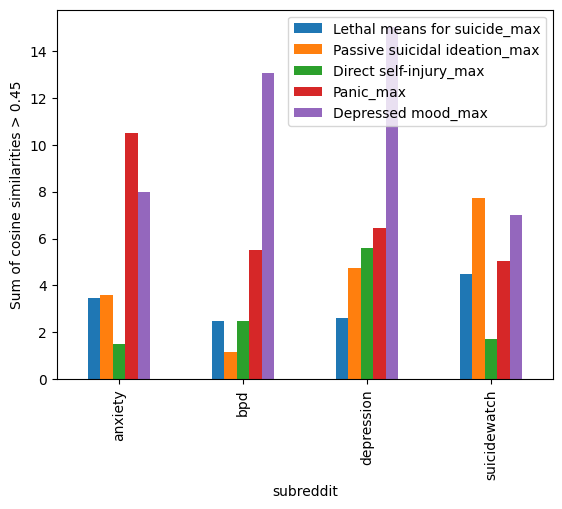

In [142]:
# If below threshold then replace with NaN
threshold = 0.45 # depends on embeddings used
features_threshold = result[highlight_constructs_max]
features_threshold[features_threshold <= threshold] = np.nan
features_threshold['subreddit'] = subreddits

features_threshold[highlight_constructs_max+['subreddit']].groupby('subreddit').sum().plot.bar()
plt.ylabel(f'Sum of cosine similarities > {threshold}')

/var/folders/6f/x95fldf13xn_k25tybdzgtqw0000gn/T/ipykernel_59795/3969709421.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_threshold[features_threshold <= threshold] = np.nan
/var/folders/6f/x95fldf13xn_k25tybdzgtqw0000gn/T/ipykernel_59795/3969709421.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_threshold[features_threshold <= threshold] = np.nan
/var/folders/6f/x95fldf13xn_k25tybdzgtqw0000gn/T/ipykernel_59795/3969709421.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

Text(0, 0.5, 'Sum of cosine similarities > 0.7')

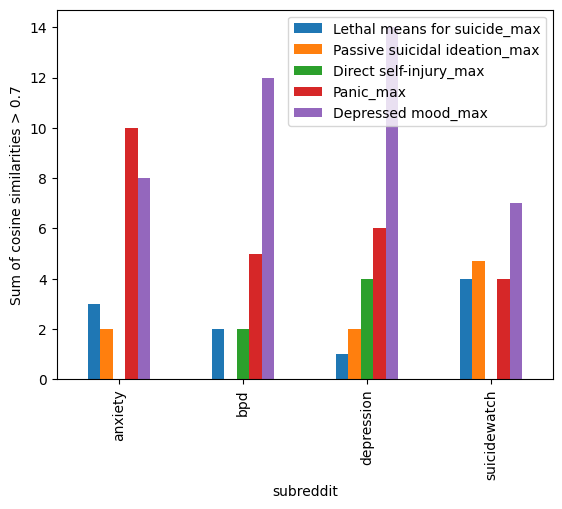

In [143]:
# If below threshold then replace with NaN
threshold = 0.70 # depends on embeddings used
features_threshold = result[highlight_constructs_max]
features_threshold[features_threshold <= threshold] = np.nan
features_threshold['subreddit'] = subreddits

features_threshold[highlight_constructs_max+['subreddit']].groupby('subreddit').sum().plot.bar()
plt.ylabel(f'Sum of cosine similarities > {threshold}')

In [118]:
# TODO: tokenization messing up space, which doesnt allow highlithing matches in context
# TODO: highlight exact match if possible: replace values in cosine_similarities
# Interpret scores
doc_id = 7

# Interpret counts: visualize matches in context  

highlight_constructs = ['Lethal means for suicide', 'Passive suicidal ideation', 'Direct self-injury', 'Panic', 'Depressed mood']
for construct in highlight_constructs:
	print(f'Matches for {construct}:')
	
	most_similar_lexicon_token, most_similar_document_token, highest_similarity = cts.get_highest_similarity_phrase(doc_id, construct, documents_subset, documents_tokenized, cosine_similarities, lexicon_dict_final_order)
	print()



Matches for Lethal means for suicide:
The construct 'Lethal means for suicide' through its token 'slice my wrist' had the highest cosine similarity (0.44) with the following document token:
'Obviously the bracelet was half my fault, I ’m mad at myself for that.'



Matches for Passive suicidal ideation:
The construct 'Passive suicidal ideation' through its token 'stop living' had the highest cosine similarity (0.55) with the following document token:
'quit'



Matches for Direct self-injury:
The construct 'Direct self-injury' through its token 'wound myself' had the highest cosine similarity (0.44) with the following document token:
'just cried'



Matches for Panic:
The construct 'Panic' through its token 'afraid' had the highest cosine similarity (0.39) with the following document token:
'just cried'



Matches for Depressed mood:
The construct 'Depressed mood' through its token 'cried' had the highest cosine similarity (0.83) with the following document token:
'just cried'
